In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Random Forest Regression

In [22]:
data = pd.read_csv("mc_data.csv")  
data = data.dropna()
data.head()

X = data[["Capacitive %", "Temperature", "Humidity"]]  # Features
y = data["MC %"]  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# train the random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Filter out zero values in y_test
nonzero_indices = y_test != 0  
y_test_filtered = y_test[nonzero_indices]
predictions_filtered = y_pred_rf[nonzero_indices]

#Compute MAPE only for non-zero actual values
if len(y_test_filtered) > 0:
    mape_rf = np.mean(np.abs((y_test_filtered - predictions_filtered) / y_test_filtered)) * 100  
    accuracy_rf = 100 - mape_rf
else:
    mape_rf = np.nan
    accuracy_rf = np.nan

accuracy_rf = 100 - mape_rf


print("Random Forest Regression completed. Metrics and coefficients saved.")
print(f"MSE: {mse_rf:.5f}, RMSE: {rmse_rf:.5f}, MAE: {mae_rf:.5f}, "
      f"R2: {r2_rf:.5f}, MAPE: {mape_rf:.5f}%, Accuracy: {accuracy_rf:.5f}%")

Random Forest Regression completed. Metrics and coefficients saved.
MSE: 5.44281, RMSE: 2.33298, MAE: 1.55307, R2: 0.94759, MAPE: 7.55982%, Accuracy: 92.44018%


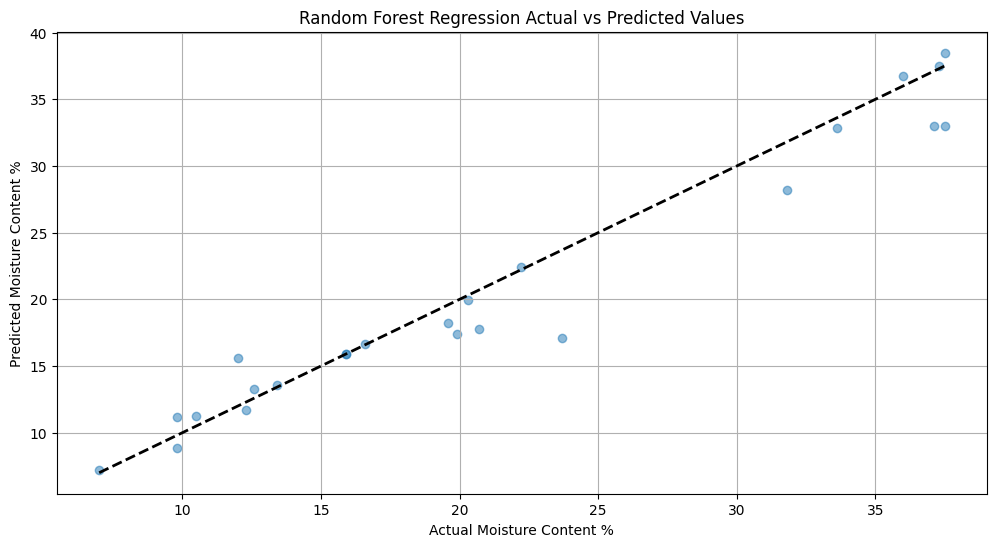

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest Regression Actual vs Predicted Values')
plt.xlabel('Actual Moisture Content %')
plt.ylabel('Predicted Moisture Content %')
plt.grid(True)
plt.show()

In [24]:
feature_importance = model_rf.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.9900295  0.00588555 0.00408495]


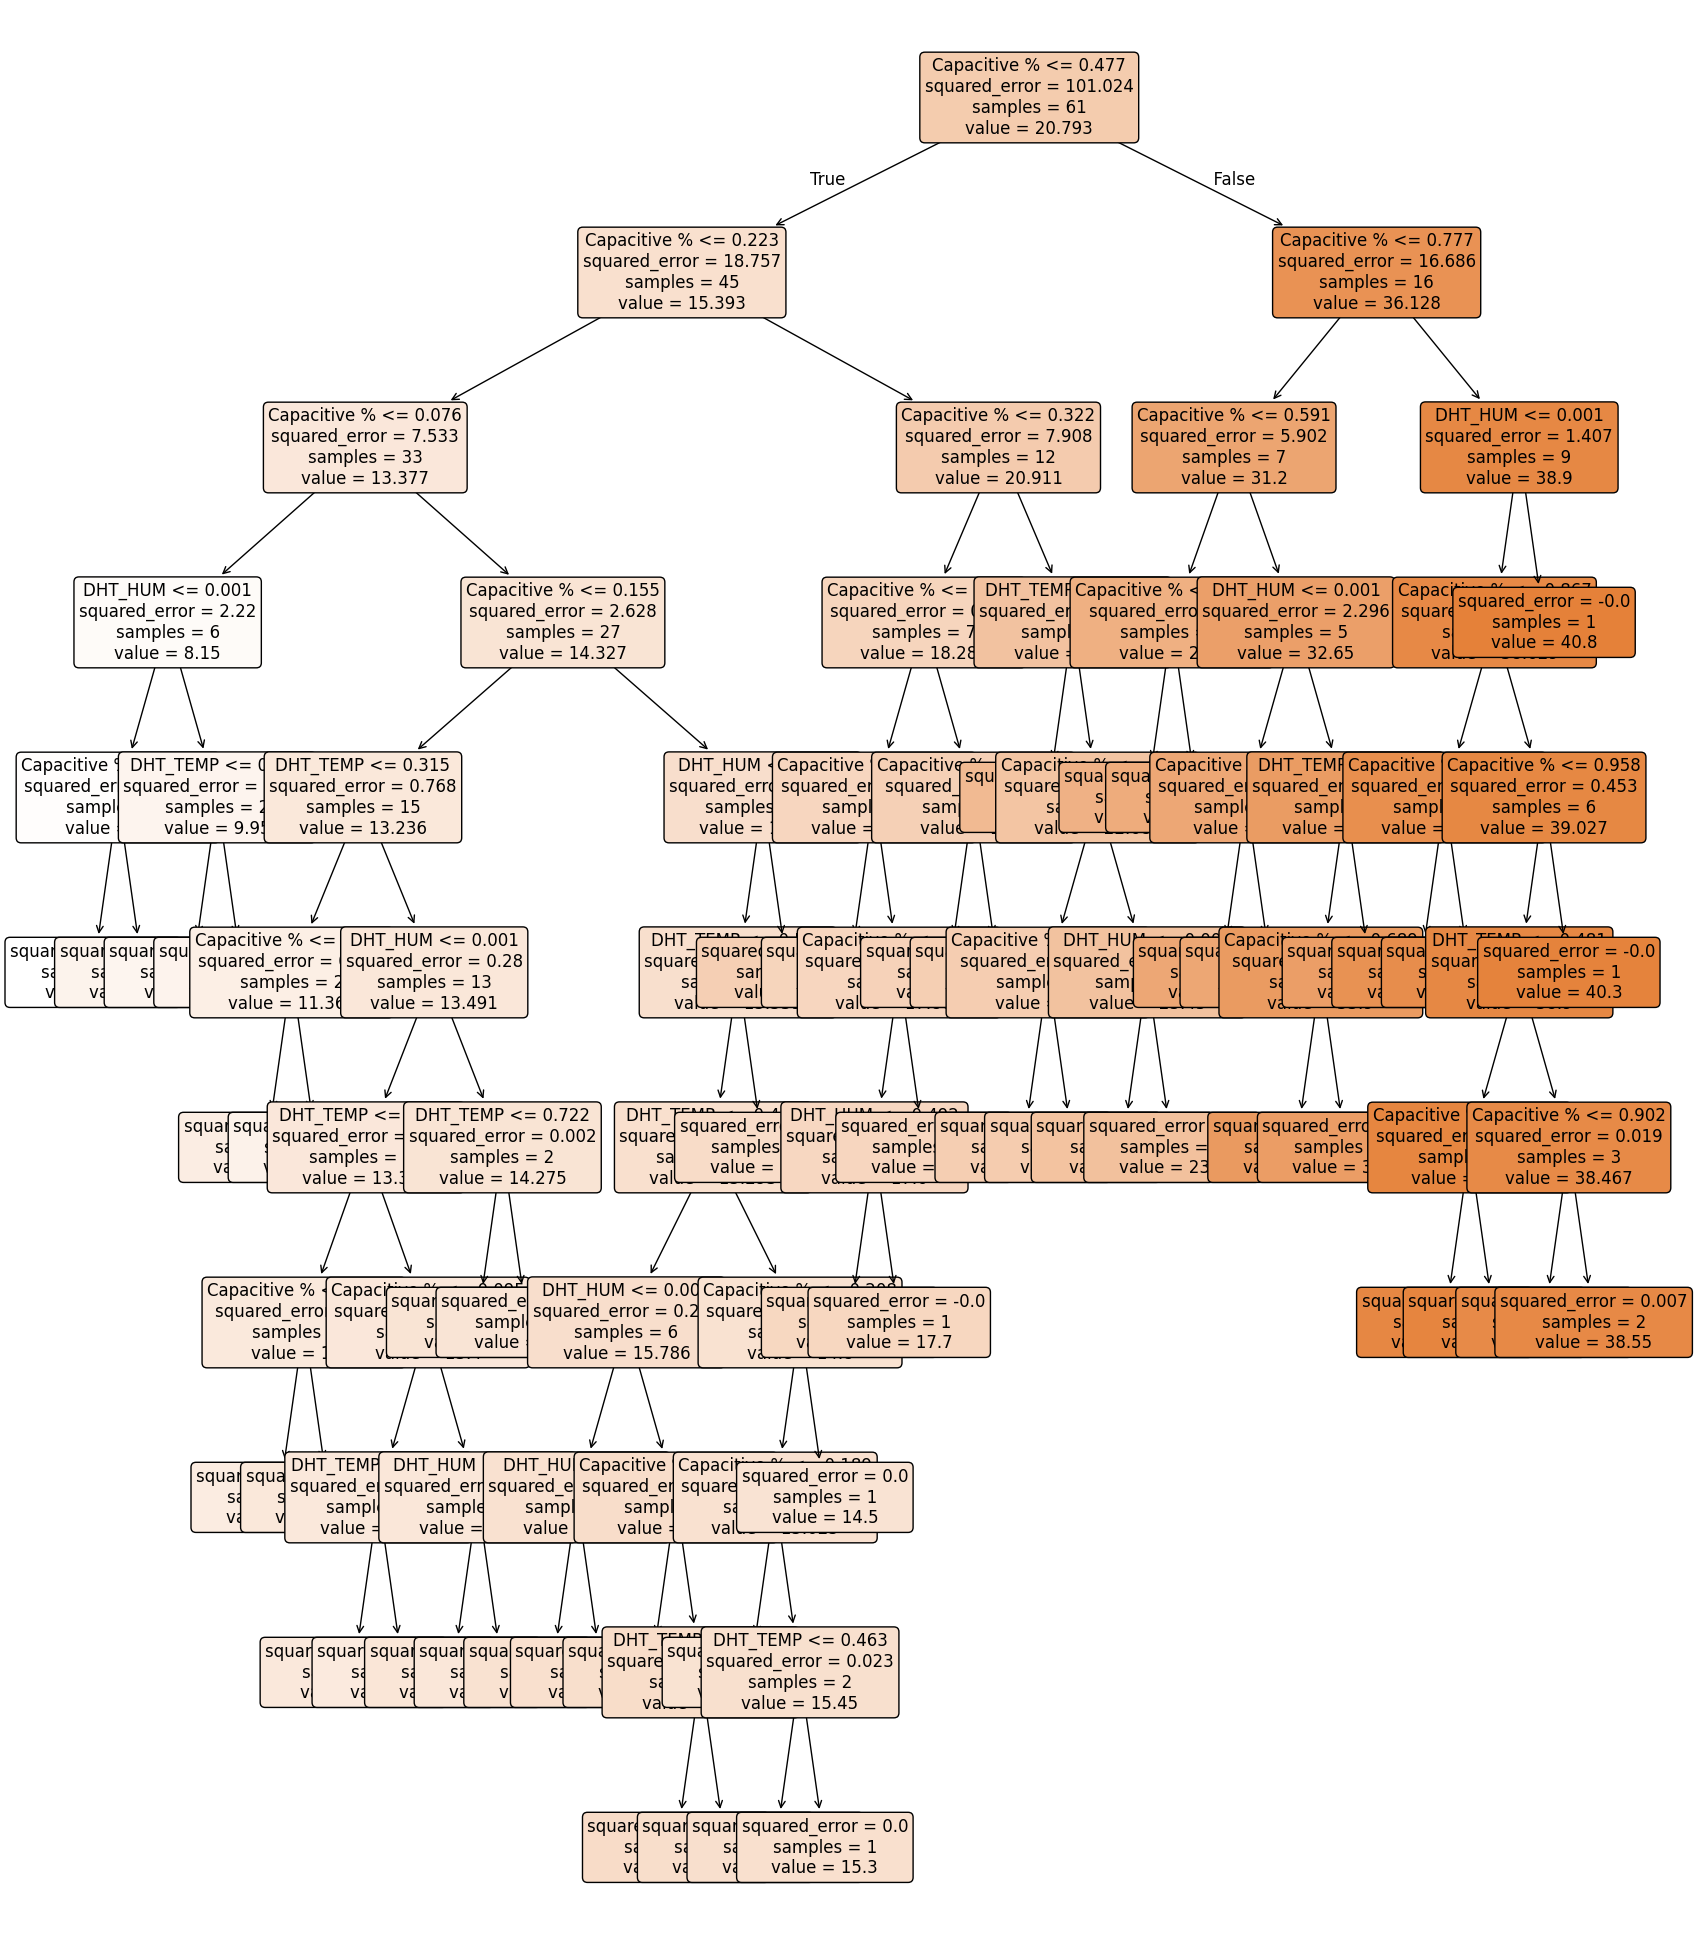

In [25]:
from sklearn.tree import plot_tree
# Feature Names
feature_names = ["Capacitive %", "DHT_TEMP", "DHT_HUM"]
# Visualize the First Tree in the Random Forest
plt.figure(figsize=(20, 25))
plot_tree(model_rf.estimators_[0], feature_names=feature_names, filled=True, rounded=True, fontsize=12)
plt.show()

In [26]:
print(len(X_test), len(y_test))  # Ensure consistency in test data
print(len(y_pred_rf))  # Ensure all predictions are present


24 24
24


Multilayer Perceptron

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [28]:
data = pd.read_csv("mc_data.csv")  
data = data.dropna()
data.head()

X = data[["Capacitive %", "Temperature", "Humidity"]]  # Features
y = data["MC %"]  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
model_mlp = Sequential([
        Input(shape=(3,)),  
        Dense(8, activation='relu'),  
        Dense(16, activation='relu'),  
        Dense(32, activation='relu'),  
        Dense(16, activation='relu'),  
        Dense(1)  
    ])
# Compile the model
model_mlp.compile(
    optimizer='adam',
    loss='mean_squared_error',  # Use 'mean_squared_error' or 'mse'
    metrics=[
        metrics.MeanAbsoluteError(),  # MAE
        metrics.RootMeanSquaredError(),  # RMSE
        metrics.MeanSquaredError()  # MSE
    ]
)

# Display the model summary
model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
 # Train the model
history = model_mlp.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2)


Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 476.0207 - mean_absolute_error: 19.7092 - mean_squared_error: 476.0207 - root_mean_squared_error: 21.8169 - val_loss: 579.7598 - val_mean_absolute_error: 21.7620 - val_mean_squared_error: 579.7598 - val_root_mean_squared_error: 24.0782
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 475.7339 - mean_absolute_error: 19.7051 - mean_squared_error: 475.7339 - root_mean_squared_error: 21.8034 - val_loss: 577.4498 - val_mean_absolute_error: 21.7137 - val_mean_squared_error: 577.4498 - val_root_mean_squared_error: 24.0302
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 487.1260 - mean_absolute_error: 19.9164 - mean_squared_error: 487.1260 - root_mean_squared_error: 22.0502 - val_loss: 574.9097 - val_mean_absolute_error: 21.6619 - val_mean_squared_error: 574.9097 - val_root_mean_squared_error: 23.9773
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 542.1104 - mean_absolute_error: 21.0849 - mean_squared_erro

In [31]:
# Make predictions
y_pred_mlp = model_mlp.predict(X_test)

# Calculate metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Convert y_test to NumPy array if it's a Pandas Series
y_test = np.array(y_test)

# Flatten predictions to ensure shape match
predictions = y_pred_mlp.flatten()

# Ensure no shape mismatch
assert y_test.shape == predictions.shape, "Mismatch in y_test and predictions shapes!"

# Filter out zero values in y_test
nonzero_indices = y_test != 0  
y_test_filtered = y_test[nonzero_indices]
predictions_filtered = predictions[nonzero_indices]

#Compute MAPE only for non-zero actual values
if len(y_test_filtered) > 0:
    mape_mlp = np.mean(np.abs((y_test_filtered - predictions_filtered) / y_test_filtered)) * 100  
    accuracy_mlp = 100 - mape_mlp
else:
    mape_mlp = np.nan
    accurac_mlp = np.nan



print("Multilayer Perceptron training completed. ")
print(f"MSE: {mse_mlp:.5f}, RMSE: {rmse_mlp:.5f}, MAE: {mae_mlp:.5f}, "
      f"R2: {r2_mlp:.5f}, MAPE: {mape_mlp:.5f}%, Accuracy: {accuracy_mlp:.5f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Multilayer Perceptron training completed. 
MSE: 4.06553, RMSE: 2.01632, MAE: 1.55648, R2: 0.96085, MAPE: 8.70506%, Accuracy: 91.29494%


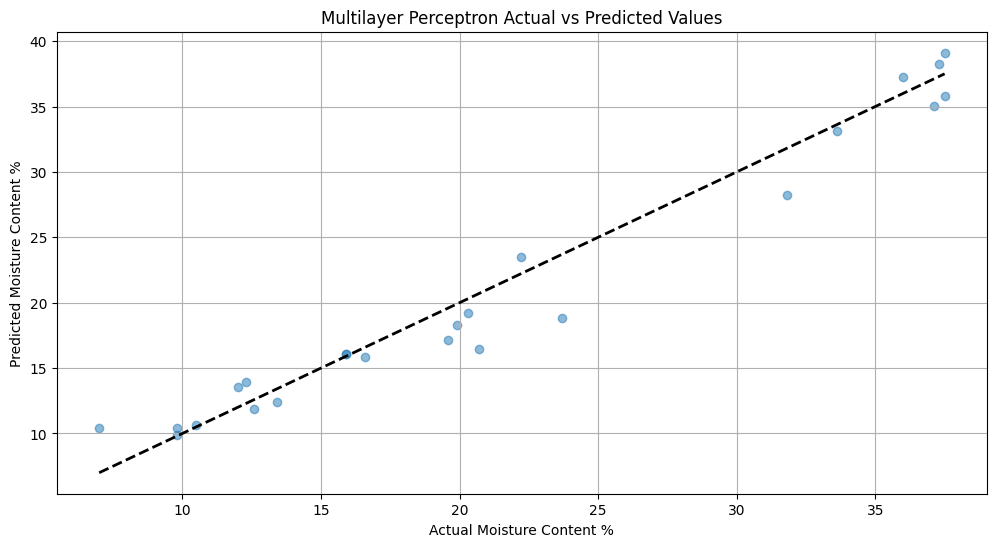

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Multilayer Perceptron Actual vs Predicted Values')
plt.xlabel('Actual Moisture Content %')
plt.ylabel('Predicted Moisture Content %')
plt.grid(True)
plt.show()

In [33]:
import pandas as pd
import os

# Define the file name
file_name = "mc_model_METRIC.csv"

# Check if the file exists to determine whether to write the header
write_header = not os.path.exists(file_name)

# Create a DataFrame with both models' results
results = pd.DataFrame([
    {
        "Version": "Random Forest Regression",
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "MAE": mae_rf,
        "R2": r2_rf,
        "MAPE (%)": mape_rf,
        "Accuracy (%)": accuracy_rf
    },
    {
        "Version": "Multilayer Perceptron",
        "MSE": mse_mlp,
        "RMSE": rmse_mlp,
        "MAE": mae_mlp,
        "R2": r2_mlp,
        "MAPE (%)": mape_mlp,
        "Accuracy (%)": accuracy_mlp
    }
])

# Append the results to the CSV file, writing header only if the file does not exist
results.to_csv(file_name, mode="a", index=False, header=write_header)

print("Metrics for both models have been saved.")


Metrics for both models have been saved.


In [34]:
import joblib

# Save the models
joblib.dump(model_rf, 'rf_mc_model.joblib')
joblib.dump(model_mlp, 'mlp_mc_model.joblib')

# Save the shared scaler only once
joblib.dump(scaler, 'moisture_content_scaler.joblib')

print("Models and scaler have been saved successfully.")


Models and scaler have been saved successfully.


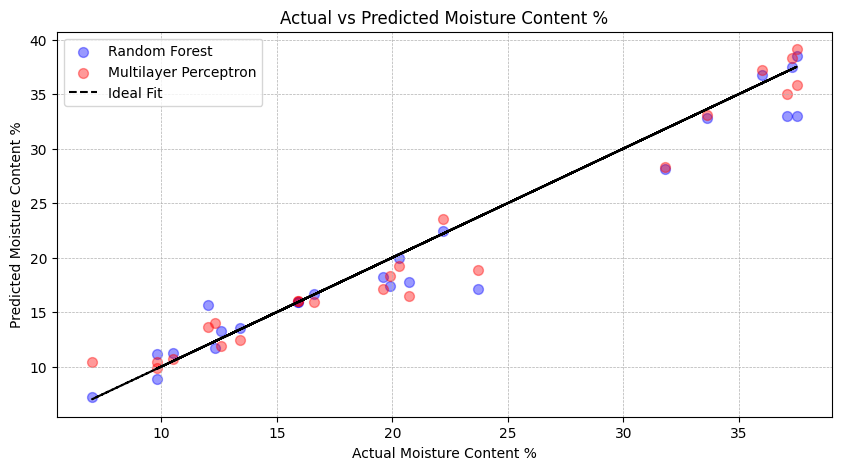

In [35]:
# Create scatter plot 
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.4, s=50, label='Random Forest')  
plt.scatter(y_test, y_pred_mlp, color='red', alpha=0.4, s=50, label='Multilayer Perceptron')  

# Add reference line (ideal predictions)
plt.plot(y_test, y_test, linestyle='dashed', color='black', linewidth=1.5, label='Ideal Fit')

# Labels and title
plt.xlabel("Actual Moisture Content %")
plt.ylabel("Predicted Moisture Content %")
plt.title("Actual vs Predicted Moisture Content %")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.show()


In [36]:
# Check the number of predictions for each model

# Assuming actual_values, predicted_rf, and predicted_mlp are lists or arrays
num_actual = len(y_test)
num_rf = len(y_pred_rf)
num_mlp = len(y_pred_mlp)

# Display the counts
num_actual, num_rf, num_mlp


(24, 24, 24)

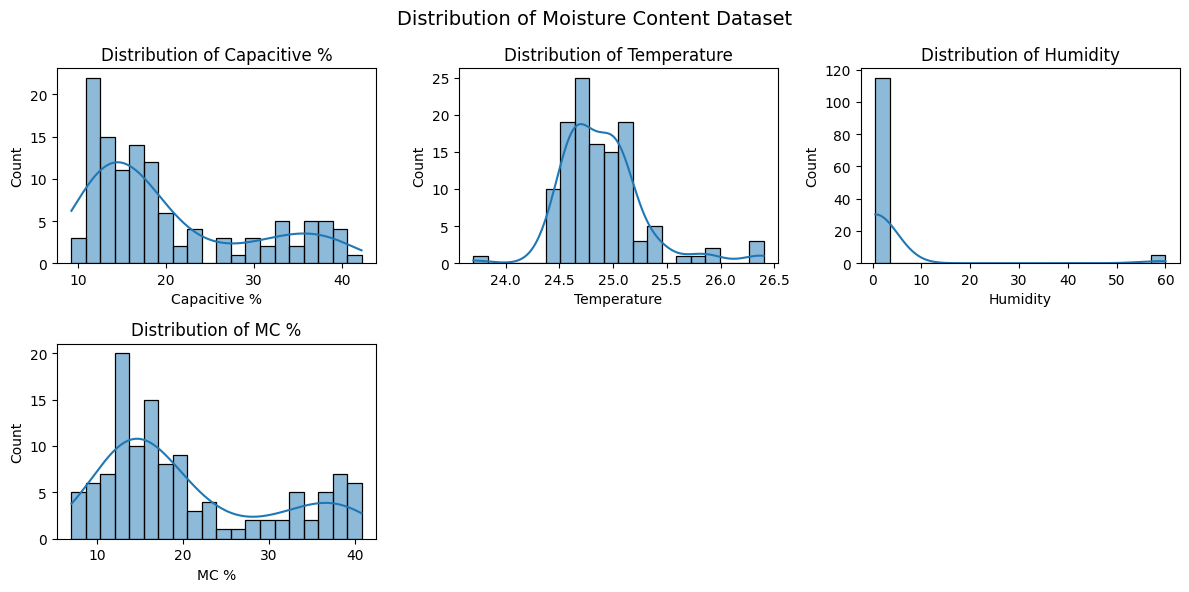

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("modified_data.csv")  
dataset = dataset.dropna()



def plot_distributions(dataset, title):
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(dataset.columns, 1):
        plt.subplot(2, len(dataset.columns) // 2 + 1, i)
        sns.histplot(dataset[column], kde=True, bins=20)
        plt.title(f"Distribution of {column}")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot distributions for each dataset
plot_distributions(dataset, "Distribution of Moisture Content Dataset")